In [63]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_csv('census_data.csv')

In [3]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
def label(x):
    if x==' <=50K':
        return 0
    else:
        return 1
data['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
data['income_bracket']=data['income_bracket'].apply(label)

In [8]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
from sklearn.model_selection import train_test_split

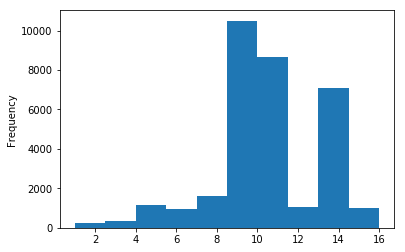

In [44]:
data['education_num'].plot(kind='hist',bins=10)

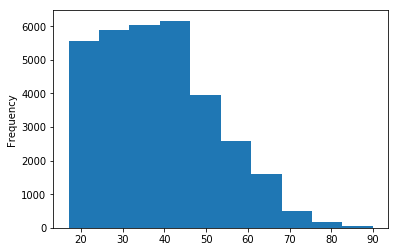

In [19]:
data['age'].plot(kind='hist')

In [26]:
data.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [37]:
list_of_cat=['workclass', 'education', 'marital_status','occupation','relationship','race','gender','native_country']
for el in list_of_cat:
    print(data[el].unique())
    print(data[el].nunique())
    print('\n')

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
9


[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16


[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
7


[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
15


[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
6


[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
5


[' Male' ' Female']
2


[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' 

In [40]:
for i in list_of_cat:
    exec("{}=tf.feature_column.categorical_column_with_hash_bucket('{}',hash_bucket_size=50)".format(i,i))

In [42]:
age_num=tf.feature_column.numeric_column('age')
age=tf.feature_column.bucketized_column(age_num,list(range(20,91,10)))

In [45]:
ed_num=tf.feature_column.numeric_column('education_num')

In [49]:
education_num=tf.feature_column.bucketized_column(ed_num,list(range(0,21,2)))

In [47]:
num_list=['capital_gain',
       'capital_loss', 'hours_per_week']

In [48]:
for el in num_list:
    exec("{}=tf.feature_column.numeric_column('{}')".format(el,el))

In [50]:
feat_cols=[age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('income_bracket',axis=1),data['income_bracket'], test_size=0.3)

In [58]:
train_input=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=5,num_epochs=5000,shuffle=True)
test_input=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=5,num_epochs=1,shuffle=False)

In [55]:
class_model=tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\PYTHON~1\\AppData\\Local\\Temp\\tmptqltwu3f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000210B06BCC18>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [56]:
class_model.train(input_fn=train_input,steps=5000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\PYTHON~1\AppData\Local\Temp\tmptqltwu3f\model.ckpt.
INFO:tensorflow:loss = 3.465736, step = 0
INFO:tensorflow:global_step/sec: 55.1108
INFO:tensorflow:loss = 24.222519, step = 100 (1.817 sec)
INFO:tensorflow:global_step/sec: 72.1464
INFO:tensorflow:loss = 49.810753, step = 200 (1.385 sec)
INFO:tensorflow:global_step/sec: 73.0261
INFO:tensorflow:loss = 0.3679693, step = 300 (1.370 sec)
INFO:tensorflow:global_step/sec: 71.7324
INFO:tensorflow:loss = 27.2805

In [60]:
predictions=list(class_model.predict(input_fn=test_input))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\PYTHON~1\AppData\Local\Temp\tmptqltwu3f\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [68]:
lop=[]
for el in predictions:
    lop.append(el['probabilities'].argmax())

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(confusion_matrix(y_test,lop))

[[6573  831]
 [ 938 1427]]


In [72]:
print(classification_report(y_test,lop))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7404
           1       0.63      0.60      0.62      2365

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769

